# How to visualize images in RxRx1

The RxRx1 cellular image dataset is made up of 6-channel images, where each channel illuminates different parts of the cell (visit [RxRx.ai](https://www.rxrx.ai/#the-data) for details).  This notebook demonstrates how to use the code in [rxrx1-utils](https://github.com/recursionpharma/rxrx1-utils) to load and visualize the RxRx1 images.

In [0]:
import sys
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
if 'google.colab' in sys.modules:
    !git clone https://github.com/recursionpharma/rxrx1-utils
    sys.path.append('/content/rxrx1-utils')

import rxrx.io as rio

Cloning into 'rxrx1-utils'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 65 (delta 25), reused 54 (delta 14), pack-reused 0
Unpacking objects: 100% (65/65), done.


## Loading a site and visualizing individual channels

Use `load_site` to get the 512 x 512 x 6 image tensor for a site.  The arguments you pass to `load_site` tell it which image you want.  In the example below, from the `train` set, we request the image in experiment `RPE-05` on plate `3` in well `D19` at site `2`.

In [3]:
t = rio.load_site('train', 'RPE-05', 3, 'D19', 2)

t.shape

(512, 512, 6)

At this point, you can visualize the individual channels.

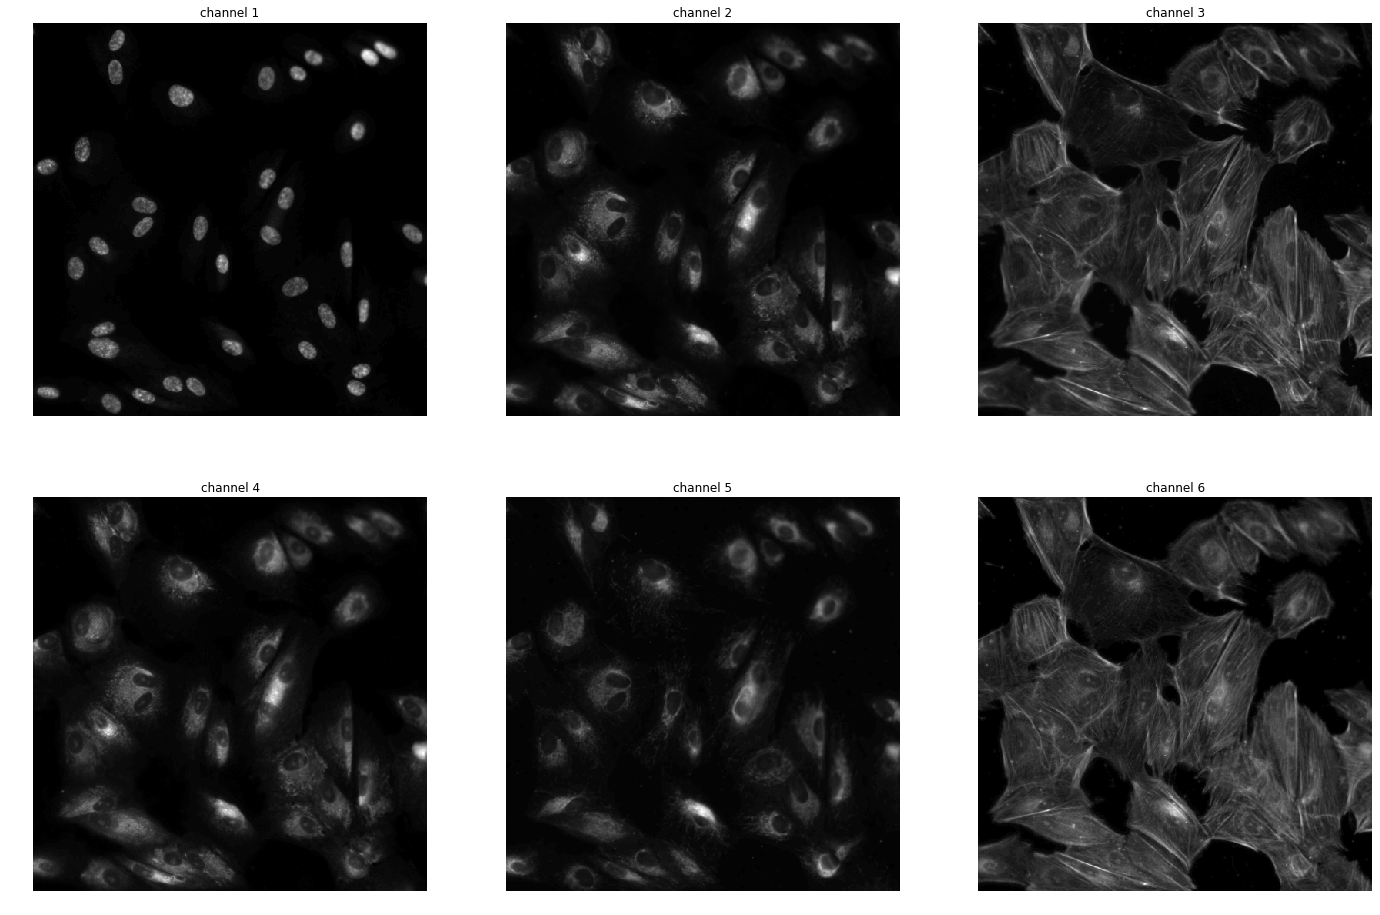

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

for i, ax in enumerate(axes.flatten()):
  ax.axis('off')
  ax.set_title('channel {}'.format(i + 1))
  _ = ax.imshow(t[:, :, i], cmap='gray')

The function `load_site` takes an optional `base_path` argument that defaults to `gs://rxrx1-us-central1/images`, one of the two Google Cloud Storage buckets containing the RxRx1 image set.   You can also set `base_path` to the path of your local copy of the dataset, and this is how you'll typically want to work with this function.

## Converting a site to RGB format

In order to visualize all six channels at once, use `convert_tensor_to_rgb`.  It associates an RGB color with each channel, then aggregates the color channels across the six cellular channels.

In [5]:
x = rio.convert_tensor_to_rgb(t)

x.shape

(512, 512, 3)

Now plot your RGB image.

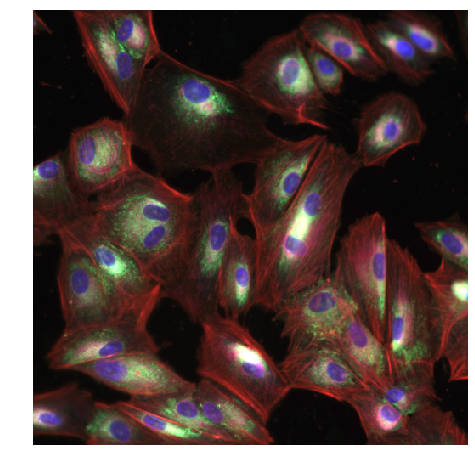

In [6]:
plt.figure(figsize=(8, 8))
plt.axis('off')

_ = plt.imshow(x)

## Load and convert to RGB

For convenience, there is a wrapper around these two functions called `load_site_as_rgb` with the same signature as `load_site`.

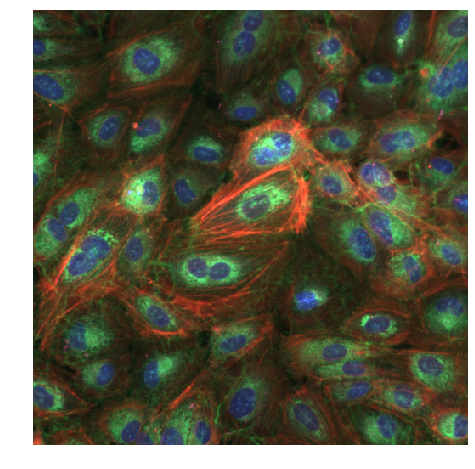

In [7]:
y = rio.load_site_as_rgb('train', 'HUVEC-08', 4, 'K09', 1)

plt.figure(figsize=(8, 8))
plt.axis('off')

_ = plt.imshow(y)

Beautiful images, aren't they?

# Combining competition metadata

The metadata for RxRx1 during the [Kaggle competition](https://www.kaggle.com/c/recursion-cellular-image-classification) is broken up into four files: `train.csv`, `train_controls.csv`, `test.csv` and `test_controls.csv`.   It is often more convenient to view all the metadata at once, so we have provided a helper function called `combine_metadata` for doing just that.

In [8]:
md = rio.combine_metadata()

md.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment


The combined metadata adds a `cell_type` and `dataset` column, and specifies a `well_type` of "treament" for all non-control sirna. Note that the `sirna` column has `NaN`s for the non-control test images since those labels are not available during the competition (they are from the wells that need to be predicted), which forces the `sirna` column to be of type `float`.